In [54]:
import numpy as np
import pandas as pd
data = {'first':[np.nan,1,1,1],
        'second': [2,np.nan,2,2],
        'third': [3,3,np.nan,3],
        'fourth': [4,4,4,np.nan]}

df = pd.DataFrame(data)
print(df)
df.fillna(df.mean(), inplace=True)
print(df)

   first  second  third  fourth
0    NaN     2.0    3.0     4.0
1    1.0     NaN    3.0     4.0
2    1.0     2.0    NaN     4.0
3    1.0     2.0    3.0     NaN
   first  second  third  fourth
0    1.0     2.0    3.0     4.0
1    1.0     2.0    3.0     4.0
2    1.0     2.0    3.0     4.0
3    1.0     2.0    3.0     4.0


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('data/tips.csv')
data['day'] = pd.Categorical(data['day'], \
                categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

In [57]:
# Display the first 10 rows.
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [58]:
# Display the last 10 rows.
data.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [59]:
# Check the shape of the dataset.
print(data.shape)

(244, 7)


In [60]:
# Display the data types of all columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    object  
 3   smoker      244 non-null    object  
 4   day         244 non-null    category
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 12.0+ KB


In [61]:
# Check for missing values.
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [62]:
# Generate summary statistics for numerical columns.
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [63]:
# Find unique values for all categorical columns.
data.describe(include=['object'])

,sex,smoker,time
count,244,244,244
unique,2,2,2
top,Male,No,Dinner
freq,157,151,176


In [64]:
# Count the frequency of each category in categorical columns.
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts(normalize=True,),'\n')

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64 

smoker
No     0.618852
Yes    0.381148
Name: proportion, dtype: float64 

time
Dinner    0.721311
Lunch     0.278689
Name: proportion, dtype: float64 



In [65]:
# Display the first 5 rows of only categorical columns.
data.select_dtypes(include=['object']).head(5)

,sex,smoker,time
0,Female,No,Dinner
1,Male,No,Dinner
2,Male,No,Dinner
3,Male,No,Dinner
4,Female,No,Dinner


In [66]:
# Display the first 5 rows of only numerical columns.
data.select_dtypes(include=['number']).head(5)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [67]:
# Find the correlation between numerical columns.
data.select_dtypes(include=['number']).corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: xlabel='count', ylabel='sex'>

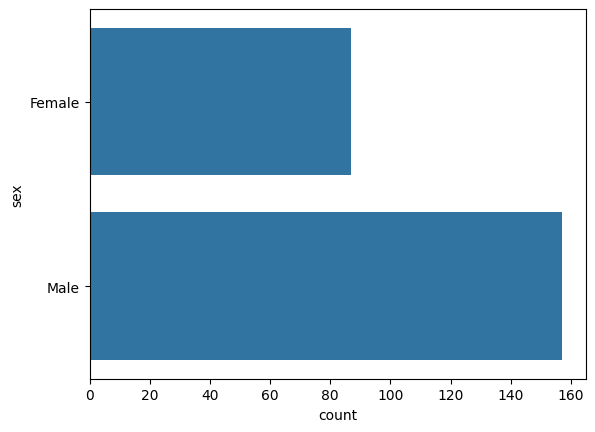

In [68]:
# Plot a countplot for sex using Seaborn.
sns.countplot(data['sex'])


<Axes: xlabel='count', ylabel='smoker'>

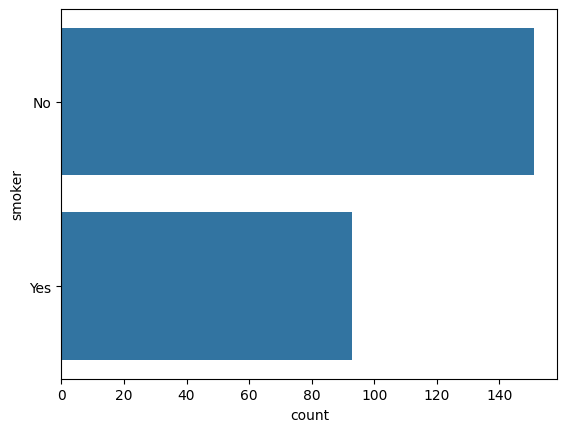

In [69]:
# Plot a countplot for smoker using Seaborn.
sns.countplot(data['smoker'])

<Axes: xlabel='count', ylabel='day'>

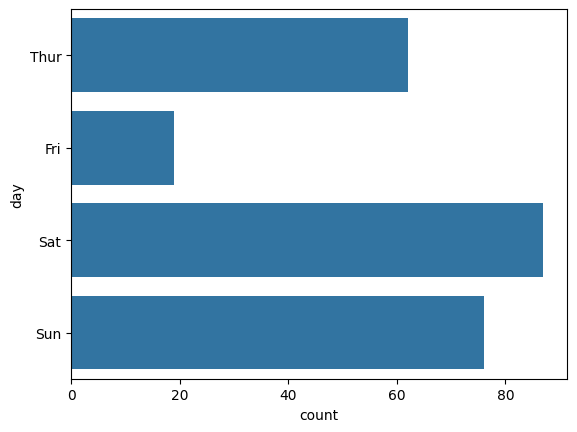

In [70]:
# Plot a countplot for day using Seaborn.
sns.countplot(data['day'])

C:\Users\Mikael Huff\AppData\Local\Temp\ipykernel_28836\1915645122.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['tip'].mean().plot(kind='bar')


<Axes: xlabel='day'>

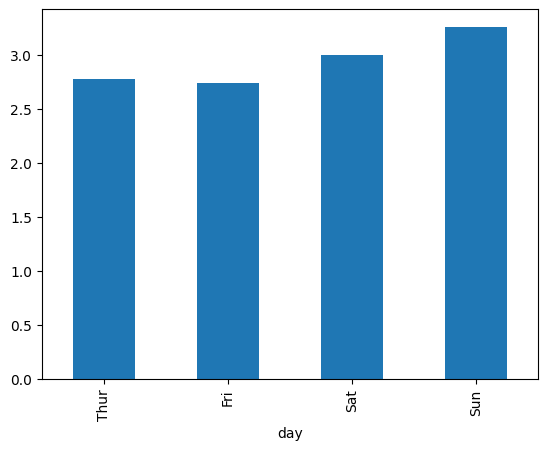

In [71]:
# Plot a bar chart showing average 
# tip for each day using Matplotlib.
data.groupby('day')['tip'].mean().plot(kind='bar')


In [72]:
# Plot a bar chart showing average 
# tip for sex using Matplotlib.
# data.groupby('sex')['tip'].mean().plot(kind='bar')
data.groupby('day')['tip'].mean()


C:\Users\Mikael Huff\AppData\Local\Temp\ipykernel_28836\3888157009.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['tip'].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

<Axes: xlabel='day'>

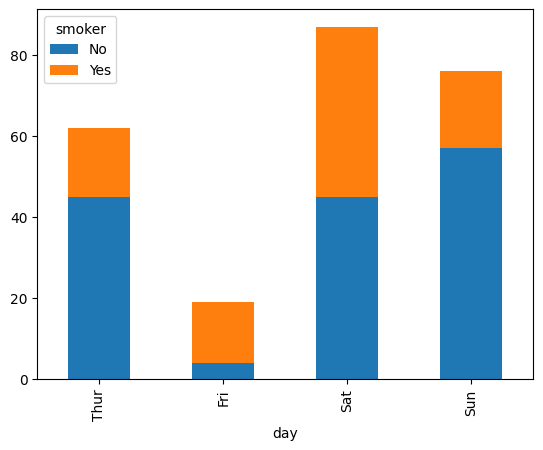

In [73]:
# Plot a stacked bar chart for day vs 
# smoker to show the number of smokers 
# and non-smokers per day using Matplotlib.

pd.crosstab(data['day'], data['smoker']) \
        .plot(kind='bar', stacked=True)


<Axes: xlabel='sex', ylabel='tip'>

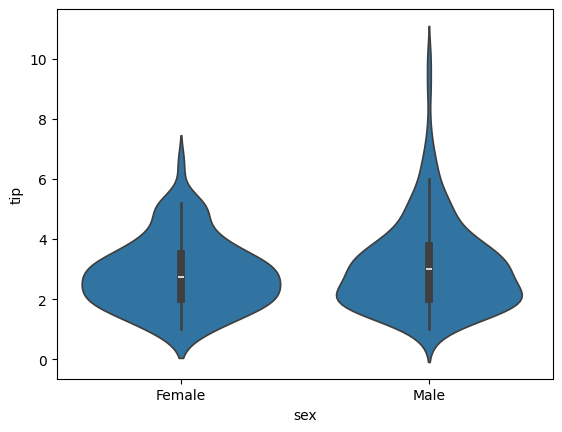

In [74]:
# Plot a violin plot for tip grouped by sex using Seaborn.
sns.violinplot(data, x='sex',y='tip')

1. Which gender tips more on average?

    Looking at the barplot, we can see that Males tip slightly more on average


2. Which day has the highest number of customers?

    Saturday

3. Are there more smokers or non-smokers visiting the restaurant?

    More non-smokers


4. Are there any patterns between day and smoker status?

    On Friday, there is more smokers than non-smokers. While the amount of smokers is not that different, there is extremely little amount of non-smokers.

5. Are there any outliers in tip for different genders?

    Males have a much higher peak on the violinplot, showing that they have more extreme outliers than Females.

6. How does the party size vary across days?

    Party size 1 does not occur on Sunday.
    Only Party size 2 really happens on Friday.
    And Party size 6 happens mostly on Thursday, but a tiny bit on Sunday too

<Axes: xlabel='day'>

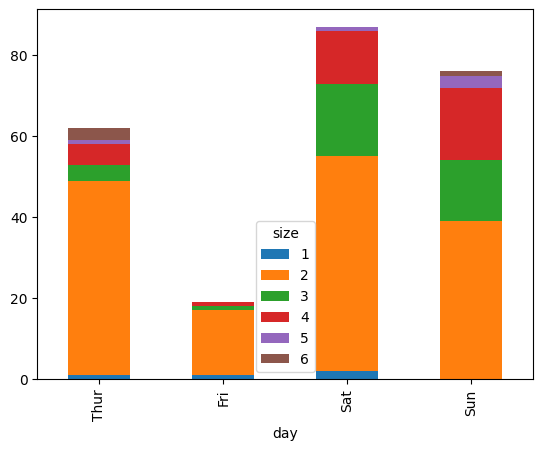

In [76]:

pd.crosstab(data['day'], data['size']) \
        .plot(kind='bar', stacked=True)

In [82]:
pd.crosstab(data['day'], data['size'])

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
